### EDA

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../SentimentDataset/sentimentdataset.csv")

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2  

In [2]:
# Check for missing values
print(df.isnull().sum())



Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


#### Inconsistency noticed. Some countries have a extra space in the beginning

In [3]:
df['Country'] = df['Country'].str.strip().str.upper()


#### Top 10 sentiments found

C:\Users\micro\AppData\Local\Temp\ipykernel_20372\3656140453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='coolwarm')


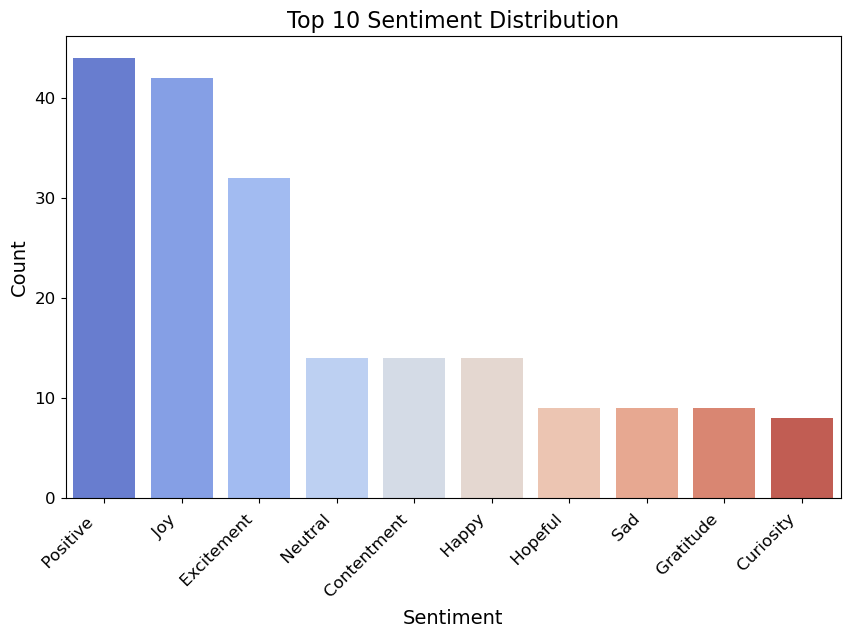

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most frequent sentiment labels
top_sentiments = df['Sentiment'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))  # Larger figure for clarity
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='coolwarm')

# Improve readability
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x labels
plt.yticks(fontsize=12)  # Make y-axis readable

plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 10 Sentiment Distribution", fontsize=16)

plt.show()


#### Text Length Analysis

count    732.000000
mean      13.206284
std        4.853229
min        4.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       25.000000
Name: Text_Length, dtype: float64


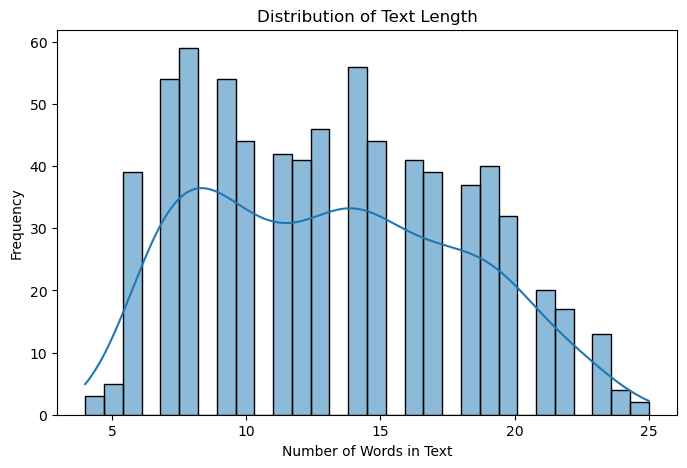

In [5]:
# Add a new column for text length
df['Text_Length'] = df['Text'].apply(lambda x: len(str(x).split()))

# Summary statistics for text length
print(df['Text_Length'].describe())

# Visualizing text length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words in Text")
plt.ylabel("Frequency")
plt.show()


#### Check for duplicate rows

In [6]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# If needed, remove duplicates
df = df.drop_duplicates()


Duplicate Rows: 0


#### Most Common Words

C:\Users\micro\AppData\Local\Temp\ipykernel_20372\4013333097.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


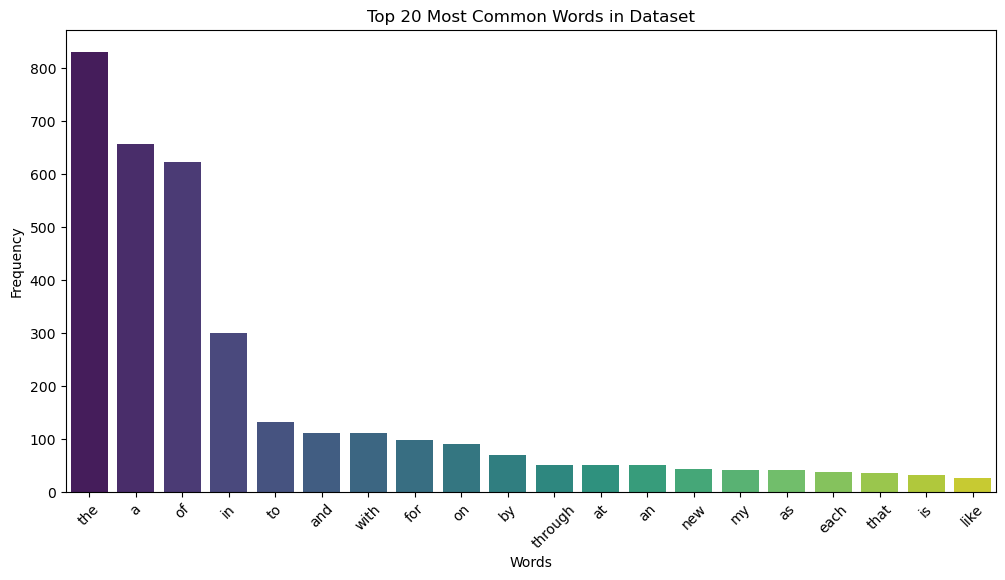

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Function to clean text (basic)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters/numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning
df['Clean_Text'] = df['Text'].apply(clean_text)

# Get most common words
all_words = " ".join(df['Clean_Text']).split()
word_freq = Counter(all_words)

# Get top 20 words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)  # Separate words and their counts

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Dataset")
plt.show()


#### Understanding other features

In [8]:
# Check unique values in categorical columns
categorical_cols = ['Platform', 'Country', 'User']
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

# Check the impact of retweets/likes
print(df[['Retweets', 'Likes']].describe())


Unique values in Platform: 4
Unique values in Country: 33
Unique values in User: 685
         Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000


#### Sentiment Distribution (Class Imbalance)

In [9]:
# Calculate percentage of each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):\n", sentiment_counts)


Sentiment Distribution (%):
 Sentiment
 Positive           6.010929
 Joy                5.737705
 Excitement         4.371585
 Neutral            1.912568
 Contentment        1.912568
                      ...   
 Adrenaline         0.136612
 Harmony            0.136612
 ArtisticBurst      0.136612
 Radiance           0.136612
 Elegance           0.136612
Name: proportion, Length: 279, dtype: float64


#### Likes vs Sentiment
- We tried to observe how does the number of likes change with the sentiment. 
- Which sentiment is getting most number of likes. Which sentiment is generally getting lesser number of likes

C:\Users\micro\AppData\Local\Temp\ipykernel_20372\4244699868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_top['Sentiment'], y=df_top['Likes'], palette='coolwarm')


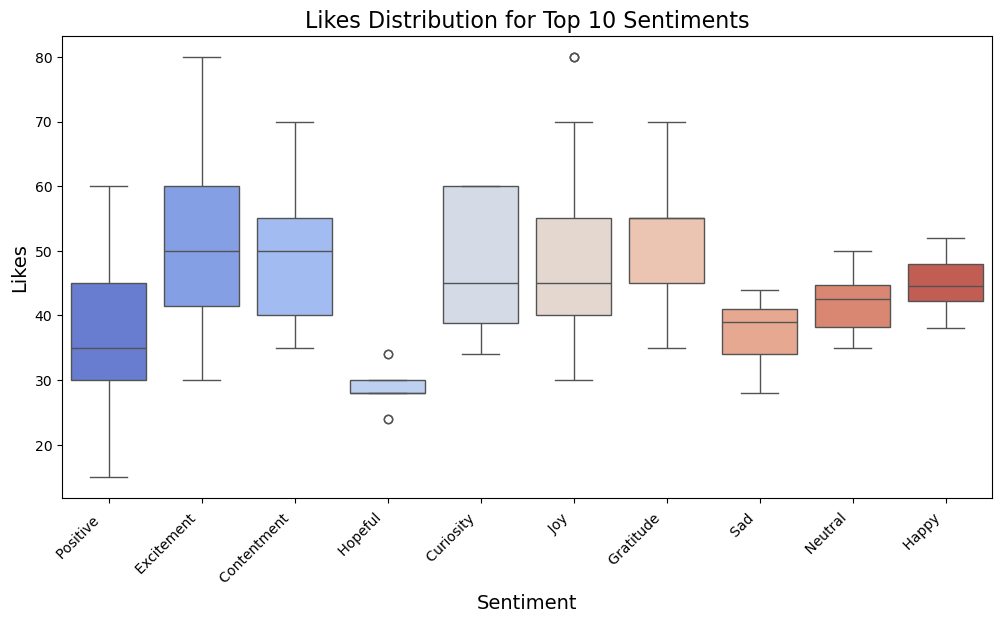

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent sentiments
top_n = 10
top_sentiments = df['Sentiment'].value_counts().nlargest(top_n).index
df_top = df[df['Sentiment'].isin(top_sentiments)]

plt.figure(figsize=(12, 6))  # Increase figure size
sns.boxplot(x=df_top['Sentiment'], y=df_top['Likes'], palette='coolwarm')

plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Likes", fontsize=14)
plt.title(f"Likes Distribution for Top {top_n} Sentiments", fontsize=16)
plt.show()


In [11]:
import pandas as pd

# Get the top 10 most frequent sentiments
top_n = 10
top_sentiments = df['Sentiment'].value_counts().nlargest(top_n).index
df_top_likes = df[df['Sentiment'].isin(top_sentiments)][['Sentiment', 'Likes']]

# Compute median, IQR, and spread for each sentiment
likes_stats = df_top_likes.groupby('Sentiment')['Likes'].describe()[['50%', 'std', '25%', '75%']]
likes_stats.rename(columns={'50%': 'Median', 'std': 'Std Dev', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

# Compute IQR (Interquartile Range) and Spread (Max - Min)
likes_stats['IQR'] = likes_stats['Q3'] - likes_stats['Q1']
likes_stats = likes_stats.sort_values(by='Median', ascending=False)

# Extract insights
highest_median_sentiment = likes_stats['Median'].idxmax()
widest_spread_sentiment = likes_stats['IQR'].idxmax()
lowest_engagement_sentiment = likes_stats['Median'].idxmin()

# Display results
print("Sentiment with Highest Median Likes:", highest_median_sentiment)
print("Sentiment with Widest Spread (High Variability):", widest_spread_sentiment)
print("Sentiment with Lowest Engagement (Low Median, Small IQR):", lowest_engagement_sentiment)

# Display the stats table
print("\nLikes Distribution Statistics for Top 10 Sentiments:\n", likes_stats)


Sentiment with Highest Median Likes:  Gratitude 
Sentiment with Widest Spread (High Variability):  Curiosity 
Sentiment with Lowest Engagement (Low Median, Small IQR):  Hopeful 

Likes Distribution Statistics for Top 10 Sentiments:
                Median    Std Dev     Q1     Q3    IQR
Sentiment                                            
 Gratitude       55.0  10.307764  45.00  55.00  10.00
 Contentment     50.0  11.413314  40.00  55.00  15.00
 Excitement      50.0  12.160055  41.50  60.00  18.50
 Curiosity       45.0  11.185929  38.75  60.00  21.25
 Joy             45.0  13.115320  40.00  55.00  15.00
 Happy           44.5   4.329810  42.25  48.00   5.75
 Neutral         42.5   4.827235  38.25  44.75   6.50
 Sad             39.0   5.286251  34.00  41.00   7.00
 Positive        35.0  11.283278  30.00  45.00  15.00
 Hopeful         28.0   3.620927  28.00  30.00   2.00


#### Engagement vs. Text Length

- Does longer text get more likes/retweets?


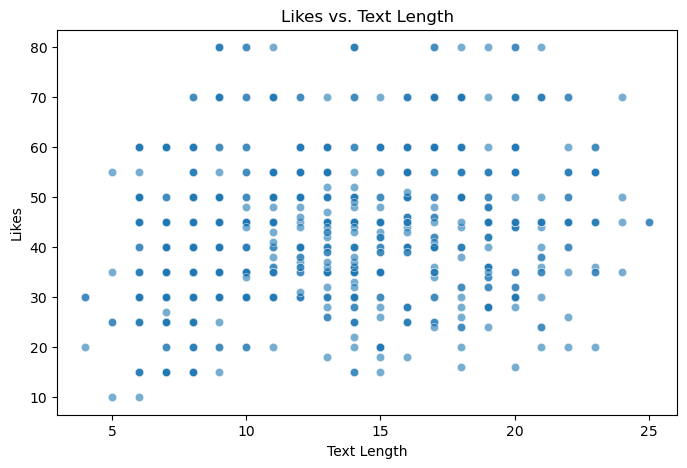

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Text_Length'], y=df['Likes'], alpha=0.6)
plt.xlabel("Text Length")
plt.ylabel("Likes")
plt.title("Likes vs. Text Length")
plt.show()


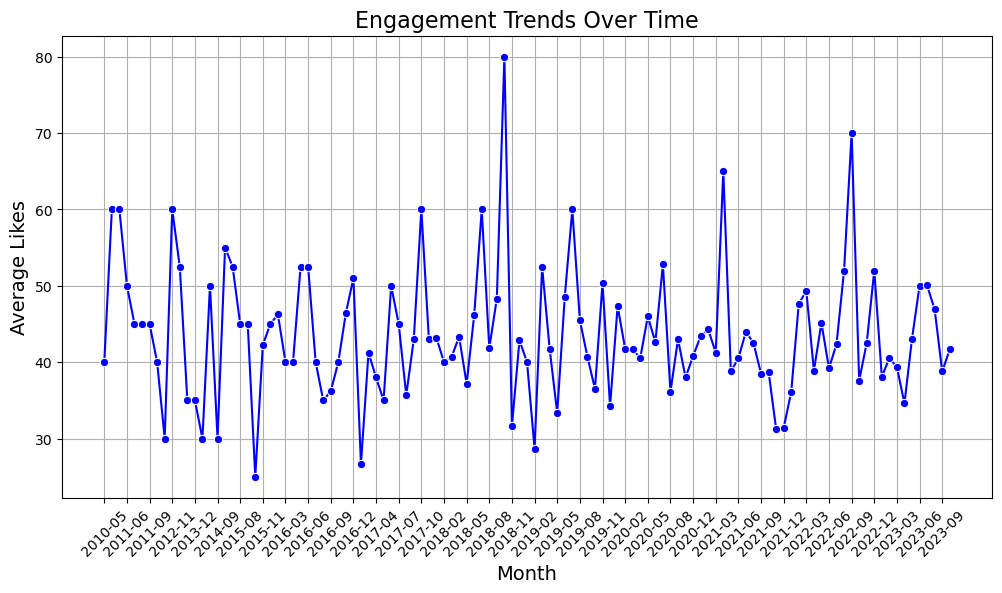

In [14]:
# Convert Timestamp column to datetime if not already
df['Date'] = pd.to_datetime(df['Timestamp'])  
df['Month'] = df['Date'].dt.to_period("M")  # Extract month-year

# Compute average likes per month
monthly_likes = df.groupby('Month')['Likes'].mean()

# Convert index to string for proper plotting
monthly_likes.index = monthly_likes.index.astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_likes.index, y=monthly_likes.values, marker="o", linestyle="-", color="b")

plt.xticks(ticks=monthly_likes.index[::3], rotation=45)  # Show every 3rd month
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.title("Engagement Trends Over Time", fontsize=16)
plt.grid(True)
plt.show()


#### Engagement by Country (Bar Plot)

C:\Users\micro\AppData\Local\Temp\ipykernel_14320\4126080854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_engagement.index[:10], y=country_engagement['Likes'][:10], palette='coolwarm')


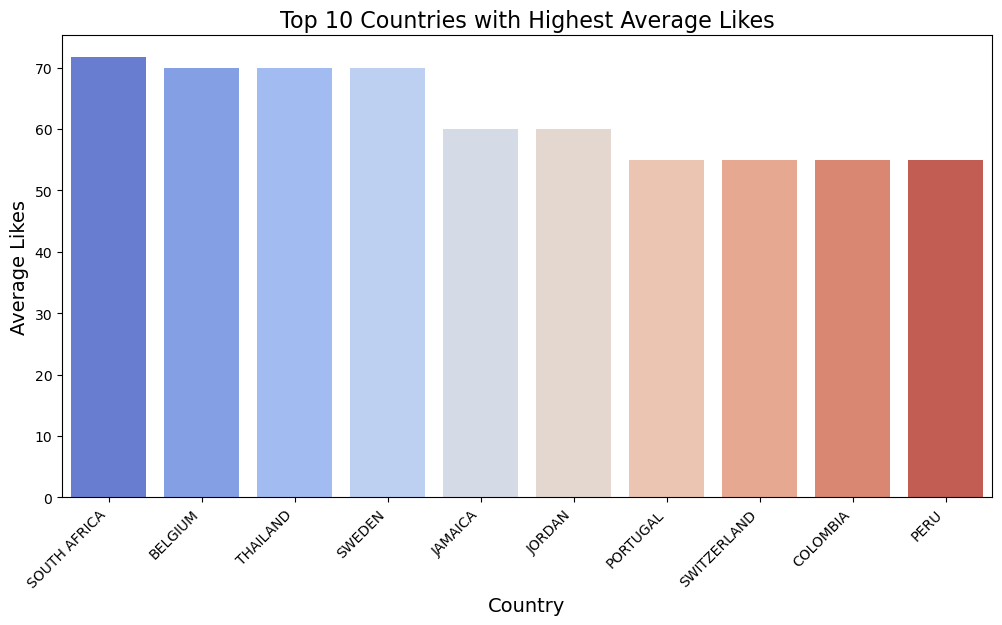

C:\Users\micro\AppData\Local\Temp\ipykernel_14320\4126080854.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_engagement.index[:10], y=country_engagement['Retweets'][:10], palette='viridis')


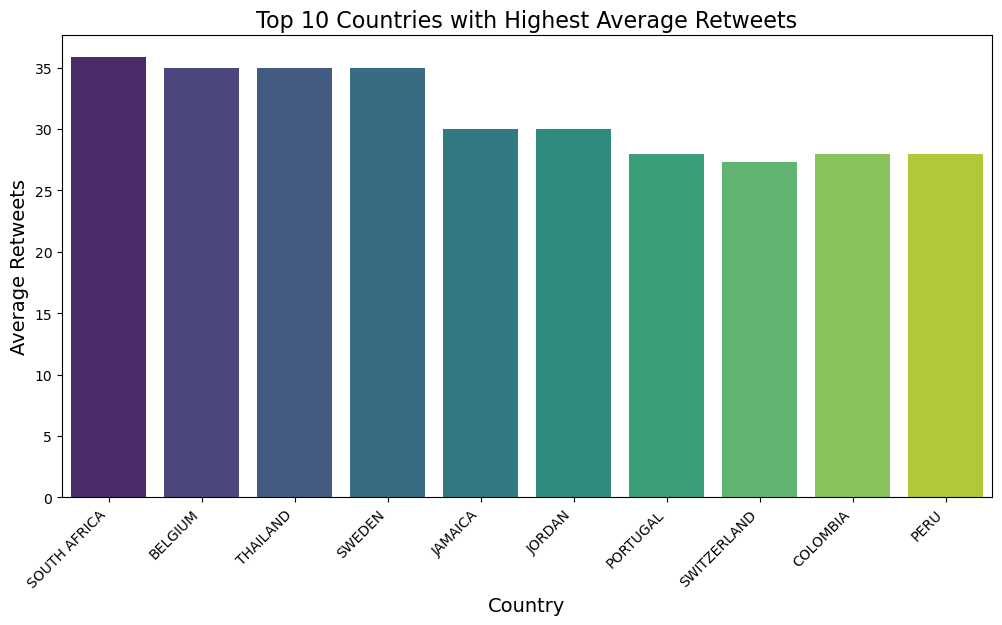

In [ ]:
# Group by country and compute average Likes & Retweets
country_engagement = df.groupby('Country')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)

# Plot Likes per country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_engagement.index[:10], y=country_engagement['Likes'][:10], palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.title("Top 10 Countries with Highest Average Likes", fontsize=16)
plt.show()

# Repeat for Retweets
plt.figure(figsize=(12, 6))
sns.barplot(x=country_engagement.index[:10], y=country_engagement['Retweets'][:10], palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Retweets", fontsize=14)
plt.title("Top 10 Countries with Highest Average Retweets", fontsize=16)
plt.show()


#### Sentiments grouped by popularity for different countries

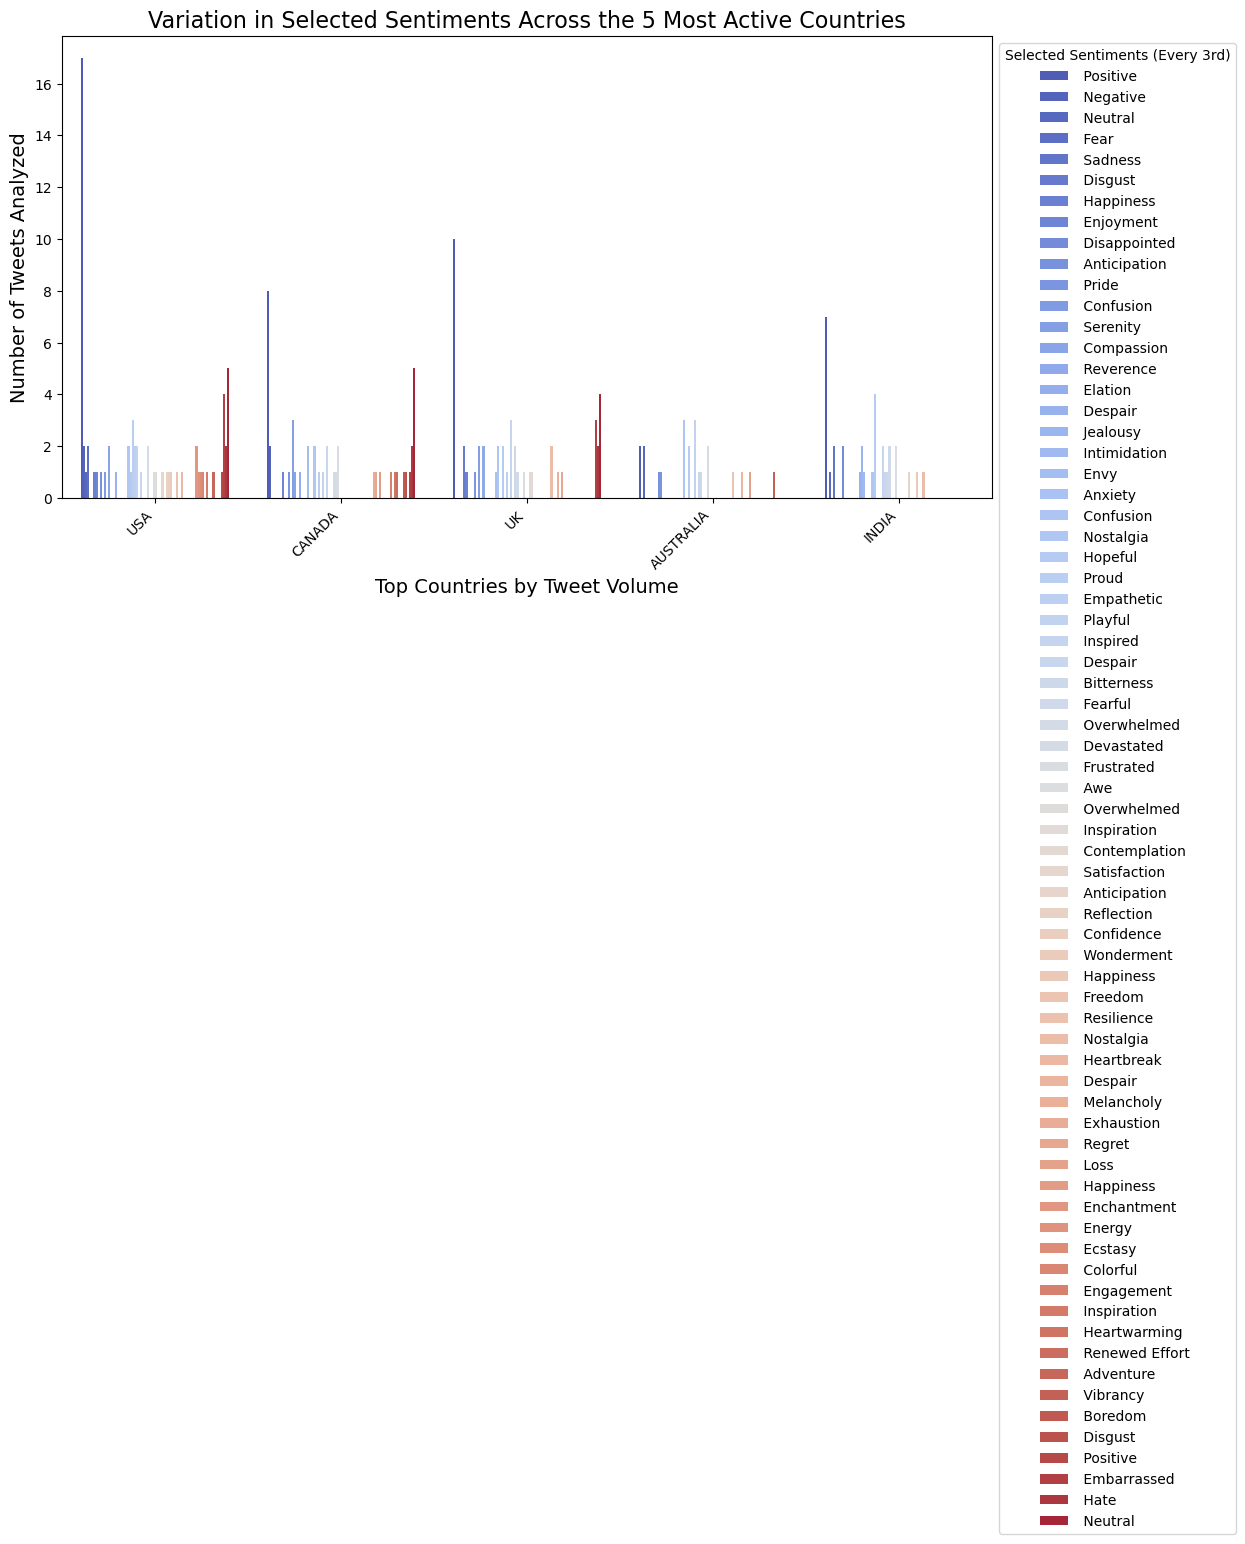

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 most active countries by tweet count
top_n = 5
top_countries = df['Country'].value_counts().nlargest(top_n).index.tolist()

# Filter dataset for selected countries and non-null sentiments
df_filtered = df[df['Country'].isin(top_countries)].dropna(subset=['Sentiment'])

# Get the most common sentiments
sorted_sentiments = df_filtered['Sentiment'].value_counts().index.tolist()

# Select every 3rd sentiment (stride = 3)
selected_sentiments = sorted_sentiments[::3]

# Filter dataset to include only the selected sentiments
df_filtered = df_filtered[df_filtered['Sentiment'].isin(selected_sentiments)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Country', hue='Sentiment', palette='coolwarm')

# Enhanced axis labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("Top Countries by Tweet Volume", fontsize=14)
plt.ylabel("Number of Tweets Analyzed", fontsize=14)
plt.title(f"Variation in Selected Sentiments Across the {top_n} Most Active Countries", fontsize=16)

# Move legend for clarity
plt.legend(title="Selected Sentiments (Every 3rd)", bbox_to_anchor=(1, 1), loc="upper left")

plt.show()
